## Task-D: Collinear features and their effect on linear models

In [51]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

## TASK 1

In [5]:
#  calculate the correlation between pairs of numeric columns in a DataFrame. 
corr=data[data.columns[:-1]].corr()
corr

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


<AxesSubplot:title={'center':'correlation between features'}>

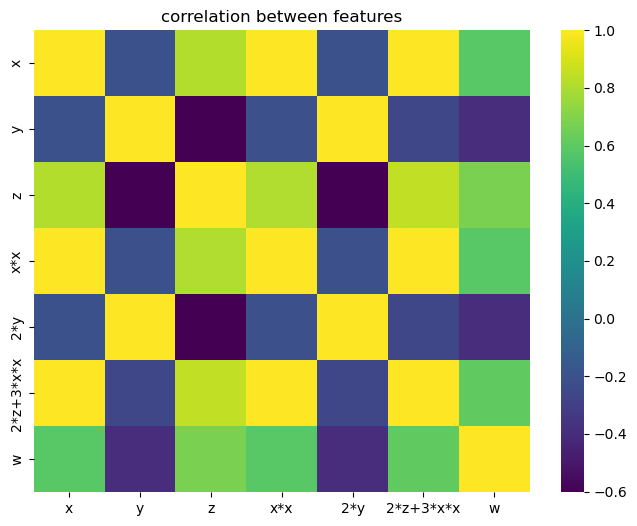

In [6]:
# plot heat map of correlation matrix using seaborn heatmap
plt.figure(figsize=(8,6))
plt.title("correlation between features")
sns.heatmap(corr, cmap="viridis",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [8]:
# generates an array of 10 values that are evenly spaced
alpha =  np.logspace(-5, 8, 10)
alpha


array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])

In [10]:
param_grid={'C':alpha}

# Build a logistic Regression
logreg = LogisticRegression()

In [11]:
# Performs hyperparameter tuning using GridSearchCV() function. 
logreg = GridSearchCV(logreg, param_grid, cv=5) 

In [12]:
logreg.fit(X,Y) # Model fitting

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])})

In [20]:
# Best parameter
best = logreg.best_params_
best_c = best["C"]

In [21]:
# Getting the weights with the original data
best_model=LogisticRegression(C=best_c).fit(X,Y)

In [22]:
predictions = best_model.predict(X) # Return the predictions

In [25]:
accuracy=accuracy_score(Y, predictions) # compute accuracy
accuracy

1.0

In [36]:
# Get weights
weight=best_model.coef_[0]
best_model.coef_


array([[ 0.00036369, -0.000345  ,  0.00048449,  0.00035933, -0.000345  ,
         0.00038189,  0.00032048]])

In [ ]:
# Modifying original data

In [28]:
X =X+.01 # add noise

In [31]:
updated_model=best_model.fit(X,Y)
prediction = best_model.predict(X)

In [33]:
# Compute accuracy

new_accuracy=accuracy_score(Y, prediction)
new_accuracy

1.0

In [44]:
new_weight=updated_model.coef_
updated_model.coef_ # Return weights

array([[ 0.00036369, -0.000345  ,  0.00048449,  0.00035933, -0.000345  ,
         0.00038189,  0.00032048]])

In [35]:
# Check deviation
new_accuracy-accuracy

0.0

In [47]:
difference = abs(weight-new_weight)[0]

In [48]:
# calulating the percentage change in weight
n=len(data.columns)-1
percentage_change=[]
for i in range (n):                  
    cp=(difference[i]/weight[i])*100
    percentage_change.append(cp)

In [49]:
#print the top 4 features which have higher % change in weights compare to the other feature
columns=list(data.columns.values)
indices=sorted(range(len(percentage_change)), key=lambda i: percentage_change[i])[-4:]
print("The top 4 features with higher % change in weights ")
for j in indices:
    print(columns[j])

The top 4 features with higher % change in weights 
x*x
2*y
2*z+3*x*x
w


## TASK 2

In [50]:
# generates an array of 10 values that are evenly spaced
alpha =  np.logspace(-5, 8, 10)
alpha


array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])

In [52]:
param_grid={'C':alpha}

# Build a  SVC
svm = SVC(kernel="linear")

In [55]:
# Performs hyperparameter tuning using GridSearchCV() function. 
svm = GridSearchCV(svm, param_grid, cv=5) 

In [56]:
svm.fit(X,Y) # Model fitting

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])})

In [57]:
# Best parameter
best = svm.best_params_
best_c = best["C"]

In [58]:
# Getting the weights with the original data
best_model=SVC(kernel='linear',C=best_c).fit(X,Y)

In [59]:
predictions = best_model.predict(X) # Return the predictions

In [60]:
accuracy=accuracy_score(Y, predictions) # compute accuracy
accuracy

1.0

In [61]:
# Get weights
weight=best_model.coef_[0]
best_model.coef_


array([[ 0.16049457, -0.20810298,  0.32832289,  0.14997999, -0.20810298,
         0.17462251,  0.13395324]])

In [ ]:
# Modifying original data

In [62]:
X =X+.01 # add noise

In [63]:
updated_model=best_model.fit(X,Y)
prediction = best_model.predict(X)

In [64]:
# Compute accuracy

new_accuracy=accuracy_score(Y, prediction)
new_accuracy

1.0

In [65]:
new_weight=updated_model.coef_
updated_model.coef_ # Return weights

array([[ 0.16055306, -0.20791863,  0.32827416,  0.14997489, -0.20791863,
         0.17461204,  0.13402026]])

In [66]:
# Check deviation
new_accuracy-accuracy

0.0

In [67]:
difference = abs(weight-new_weight)[0]

In [68]:
# calulating the percentage change in weight
n=len(data.columns)-1
percentage_change=[]
for i in range (n):                  
    cp=(difference[i]/weight[i])*100
    percentage_change.append(cp)

In [69]:
#print the top 4 features which have higher % change in weights compare to the other feature
columns=list(data.columns.values)
indices=sorted(range(len(percentage_change)), key=lambda i: percentage_change[i])[-4:]
print("The top 4 features with higher % change in weights ")
for j in indices:
    print(columns[j])

The top 4 features with higher % change in weights 
2*z+3*x*x
z
x
w


## Observations

Based on the correlation matrix, it is evident that some features are strongly correlated. After conducting perturbation tests on both SVM and LR, it was observed that the weights of these models only had minimal (very small) changes. As there were no drastic changes in weights, it can be concluded that there is no multicollinearity between the features, as determined from the perturbation tests. The top 4 features that exhibited the highest percentage change in weights are those that are highly correlated with other features, as inferred from the correlation matrix.